In [1]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

## amino acid composition

frequency of single AA

In [420]:
from aa_comp import AAComp
from isolate_aa import IsolateAA
# test
record = {
    'epitopes': {
    "1243835": {"end": 37, "id": 1243835, "seq": "TTTVQYNPSEQYQPYPEQ", "start": 20},
    "1243837": {"end": 46, "id": 1243837, "seq": "SEQYQPYPEQQEPFVQQQQ", "start": 28},
    "1243838": {"end": 55, "id": 1243838, "seq": "QQEPFVQQQQPFVQQQQPF", "start": 37},
    "1243843": {"end": 42, "id": 1243843, "seq": "YQPYPEQQEPFV", "start": 31},
    "1243845": {"end": 41, "id": 1243845, "seq": "TTTVQYNPSEQYQPYPEQQEPF", "start": 20}
    },
    'pro_seq': "MKTFLIIALLAMAVATATATTTVQYNPSEQYQPYPEQQEPFVQQQQPFVQQQQPF" + \
    "VQQQQMFLQPLLQQQLNPCKQFLVQQCSPVAAVPFLRSQILRQAICQVTRQQCCRQLAQIP" + \
    "EQLRCPAIHSVVQSIILQQQQQQQQFIQPQLQQQVFQPQLQLQQQVFQPQLQQQVFQPQLQ" + \
    "QVFNQPQMQGQIEGMRAFALQALPAMCDVYVPPQCPVATAPLGGF"
}
res = IsolateAA(record)
print(res)

In [387]:
from utils import Utils
from aa_comp import AAComp

# iterate data
json_dir = '/home/yuan/data/omics_data/epitope/mysql'
data_iter = Utils.scan_json(json_dir)
# get sequences of epitope and non-epitope
aa_data, num_pro, num_epi = AAComp.isolate_epitope_seq(data_iter)
outfile = '../data/epitopes_aa.json'
with open(outfile, 'w') as f:
    json.dump(aa_data, f, indent=4, sort_keys=True)

/home/yuan/data/omics_data/epitope/mysql/epitope_L.json
/home/yuan/data/omics_data/epitope/mysql/epitope_U.json
/home/yuan/data/omics_data/epitope/mysql/epitope_Q.json
/home/yuan/data/omics_data/epitope/mysql/epitope_E.json
/home/yuan/data/omics_data/epitope/mysql/epitope_9.json
/home/yuan/data/omics_data/epitope/mysql/epitope_W.json
/home/yuan/data/omics_data/epitope/mysql/epitope_N.json
/home/yuan/data/omics_data/epitope/mysql/epitope_7.json
/home/yuan/data/omics_data/epitope/mysql/epitope_0.json
/home/yuan/data/omics_data/epitope/mysql/epitope_1.json
/home/yuan/data/omics_data/epitope/mysql/epitope_T.json
/home/yuan/data/omics_data/epitope/mysql/epitope_C.json
/home/yuan/data/omics_data/epitope/mysql/epitope_4.json
/home/yuan/data/omics_data/epitope/mysql/epitope_R.json
/home/yuan/data/omics_data/epitope/mysql/epitope_S.json
/home/yuan/data/omics_data/epitope/mysql/epitope_D.json
/home/yuan/data/omics_data/epitope/mysql/epitope_P.json
/home/yuan/data/omics_data/epitope/mysql/epitope

In [388]:
from collections import Counter
epi_counts, epi_len = Counter(), 0
other_counts, other_len = Counter(), 0
for acc in aa_data:
    epi_seq = aa_data[acc]['epitope_seq']
    other_seq = aa_data[acc]['other_seq']
    epi_counts += Counter(epi_seq)
    other_counts += Counter(other_seq)
    epi_len += len(epi_seq)
    other_len += len(other_seq)
print(f"Number of antigens: {len(aa_data)}")
print(epi_len, other_len)

Number of antigens: 198487
11652130 109583618


In [412]:
from constants import AA, PROPERTY

aa_names = list(AA)
df = pd.DataFrame({
    'other': [other_counts.get(i, 1) for i in aa_names],
    'epitope': [epi_counts.get(i, 1) for i in aa_names],
    'aa': list(AA),
    'hydrophobicity_index': [AA[k]['hydrophobicity'] for k in aa_names],
    'hydrophobicity': [float(PROPERTY[k]['hydrophobicity']) for k in aa_names],
    'polarity': [float(PROPERTY[k]['polarity']) for k in aa_names],
    'polarizability': [float(PROPERTY[k]['polarizability']) for k in aa_names],
    'van_der_Waals_volume': [float(PROPERTY[k]['van_der_Waals_volume']) for k in aa_names],
})
df['other'] = df['other']*100/other_len
df['epitope'] = df['epitope']*100/epi_len
# set position of display
df['other_bias'] = df['other']
df['epitope_bias'] = df['epitope']
# R
df.loc[1,'other_bias'] -= 0.25
# K
df.loc[11,'other_bias'] -= 0.15
df.loc[11,'epitope_bias'] += 0.15
# P
df.loc[14,'other_bias'] += 0.1
df.loc[14,'epitope_bias'] -= 0.1
df

,other,epitope,aa,hydrophobicity_index,hydrophobicity,polarity,polarizability,van_der_Waals_volume,other_bias,epitope_bias
0,7.327979,8.081939,A,41,0.61,8.1,0.046,1.00,7.327979,8.081939
1,5.469563,5.566991,R,-14,0.60,10.5,0.291,6.13,5.219563,5.566991
2,3.900347,3.676787,N,-28,0.06,11.6,0.134,2.95,3.900347,3.676787
3,5.095376,4.470874,D,-55,0.46,13.0,0.105,2.78,5.095376,4.470874
4,2.122830,0.893416,C,49,1.07,5.5,0.128,2.43,2.122830,0.893416
5,6.794571,6.426885,E,-31,0.47,12.3,0.151,3.78,6.794571,6.426885
6,4.502263,4.356817,Q,-10,0.00,10.5,0.180,3.95,4.502263,4.356817
7,6.787227,6.011519,G,0,0.07,9.0,0.000,0.00,6.787227,6.011519
8,2.424341,2.449586,H,8,0.61,10.4,0.230,4.66,2.424341,2.449586
9,4.593144,5.321860,I,99,2.22,5.2,0.186,4.00,4.593144,5.321860


In [413]:
df.dtypes

other                   float64
epitope                 float64
aa                       object
hydrophobicity_index      int64
hydrophobicity          float64
polarity                float64
polarizability          float64
van_der_Waals_volume    float64
other_bias              float64
epitope_bias            float64
dtype: object

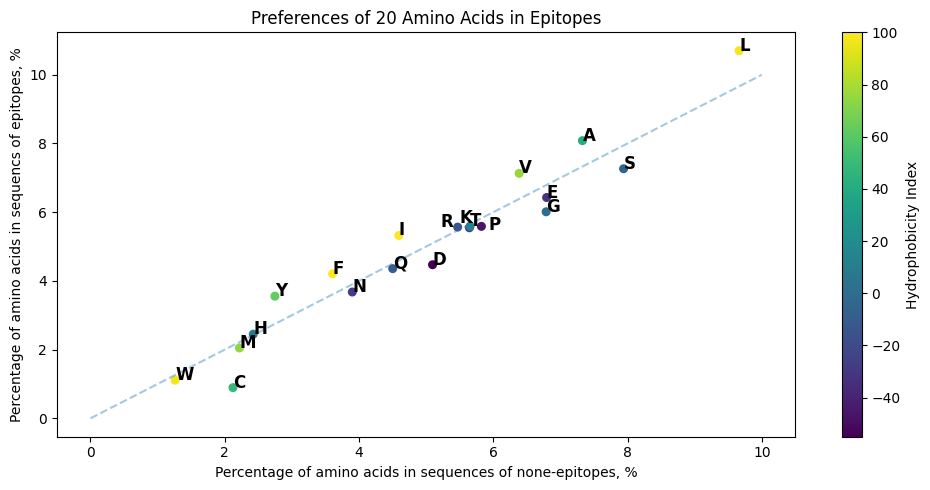

In [414]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['hydrophobicity_index'])
cbar = fig.colorbar(scatter)
cbar.set_label('Hydrophobicity Index')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

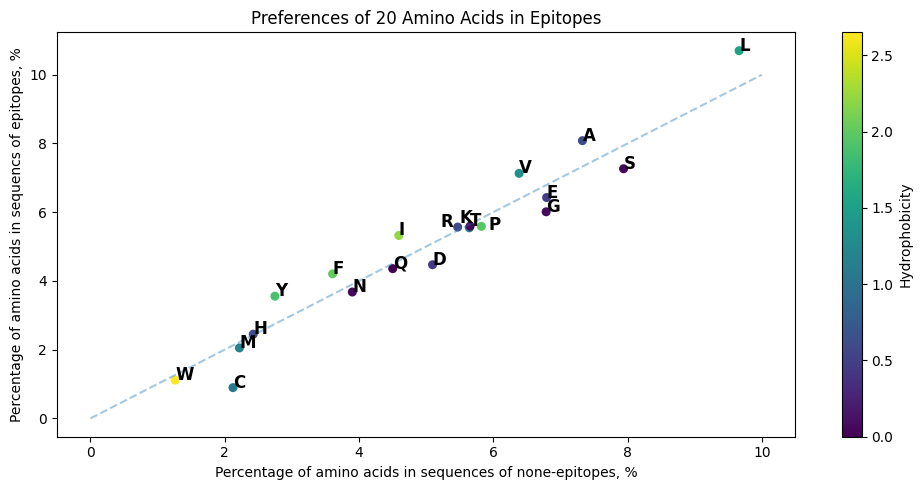

In [415]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['hydrophobicity'])
cbar = fig.colorbar(scatter)
cbar.set_label('Hydrophobicity')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

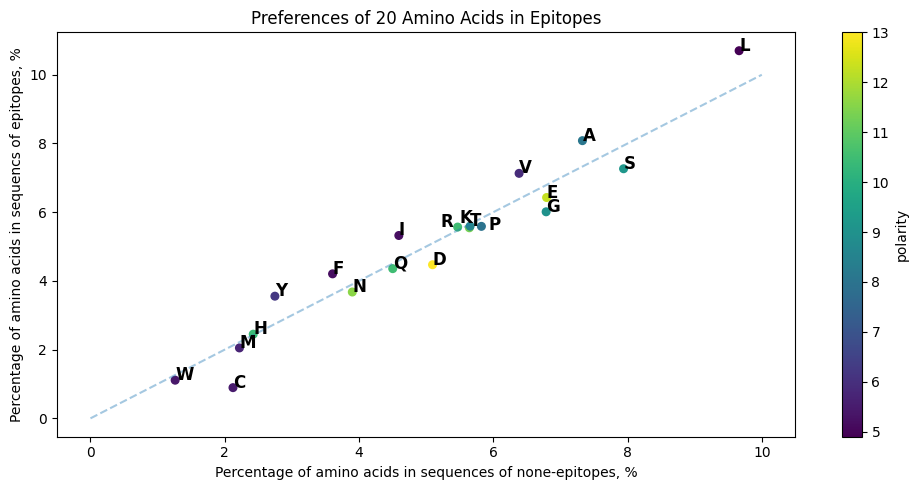

In [418]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['polarity'])
cbar = fig.colorbar(scatter)
cbar.set_label('polarity')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

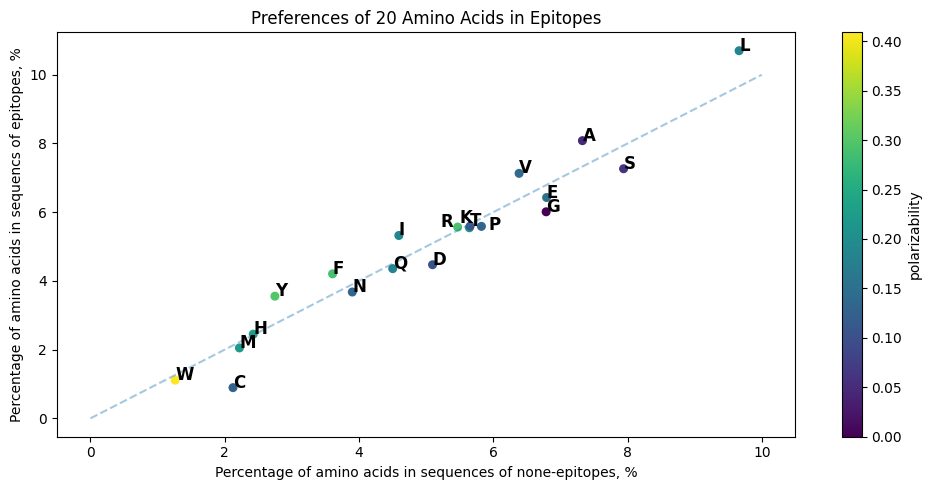

In [417]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['polarizability'])
cbar = fig.colorbar(scatter)
cbar.set_label('polarizability')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

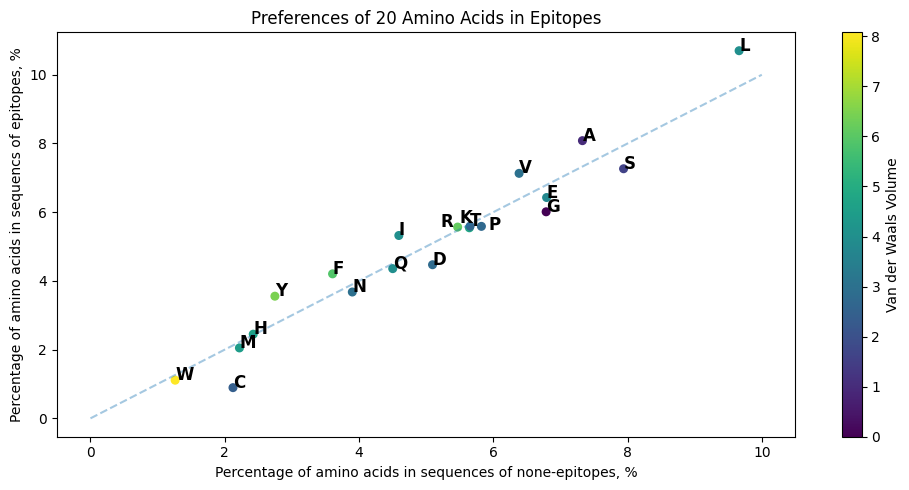

In [419]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['van_der_Waals_volume'])
cbar = fig.colorbar(scatter)
cbar.set_label('Van der Waals Volume')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

## composition of two AA

In [171]:
from utils import Utils
from aa_comp import AAComp

# iterate data
json_dir = '/home/yuan/data/omics_data/epitope/mysql'
data_iter = Utils.scan_json(json_dir)

epi_counts, total_epi, other_counts, total_other = AAComp.retrieve_epitope_2aa(data_iter)

/home/yuan/data/omics_data/epitope/mysql/epitope_L.json
/home/yuan/data/omics_data/epitope/mysql/epitope_U.json
/home/yuan/data/omics_data/epitope/mysql/epitope_Q.json
/home/yuan/data/omics_data/epitope/mysql/epitope_E.json
/home/yuan/data/omics_data/epitope/mysql/epitope_9.json
/home/yuan/data/omics_data/epitope/mysql/epitope_W.json
/home/yuan/data/omics_data/epitope/mysql/epitope_N.json
/home/yuan/data/omics_data/epitope/mysql/epitope_7.json
/home/yuan/data/omics_data/epitope/mysql/epitope_0.json
/home/yuan/data/omics_data/epitope/mysql/epitope_1.json
/home/yuan/data/omics_data/epitope/mysql/epitope_T.json
/home/yuan/data/omics_data/epitope/mysql/epitope_C.json
/home/yuan/data/omics_data/epitope/mysql/epitope_4.json
/home/yuan/data/omics_data/epitope/mysql/epitope_R.json
/home/yuan/data/omics_data/epitope/mysql/epitope_S.json
/home/yuan/data/omics_data/epitope/mysql/epitope_D.json
/home/yuan/data/omics_data/epitope/mysql/epitope_P.json
/home/yuan/data/omics_data/epitope/mysql/epitope

In [166]:
from constants import AA

def aa2_hydrophobic(x, AA):
    a, b = AA.get(x[0], {}), AA.get(x[1], {})
    if a and b:
        return a['hydrophobicity'] + b['hydrophobicity']
    return None

aa2 = list(epi_counts) + list(other_counts)
aa2 = list(set(aa2))
df = pd.DataFrame({
    'epitope': [epi_counts.get(i, 0) for i in aa2],
    'other': [other_counts.get(i, 0) for i in aa2],
    'aa': aa2,
    'hydrophobicity': [aa2_hydrophobic(x, AA) for x in aa2],
})

df['epitope'] = df['epitope']*100/total_epi
df['other'] = df['other']*100/total_other
df['diff'] = df['epitope'] - df['other']

In [167]:
n = 20
# decreased
df=df.sort_values('diff')
decreased_df = df.iloc[:n]
print(decreased_df.head())
# increased
df=df.sort_values('diff', ascending=False)
increased_df = df.iloc[:n]
print(increased_df.head())

      epitope     other  aa  hydrophobicity      diff
274  0.633970  0.834953  SS           -10.0 -0.200983
234  0.581688  0.708480  EE           -62.0 -0.126792
280  0.451282  0.576819  SG            -5.0 -0.125537
405  0.454698  0.575849  GS            -5.0 -0.121151
423  0.083770  0.203879  LC           146.0 -0.120109
      epitope     other  aa  hydrophobicity      diff
329  0.919205  0.748834  AA            82.0  0.170372
264  0.892867  0.724735  AL           138.0  0.168132
139  0.612721  0.516249  RL            83.0  0.096472
335  0.601023  0.512935  AV           117.0  0.088088
153  0.559288  0.473006  VA           117.0  0.086282


In [168]:
sorted(AA.items(), key=lambda x: x[1]['hydrophobicity'], reverse=True)

[('F', {'abb': 'phe', 'hydrophobicity': 100}),
 ('I', {'abb': 'ile', 'hydrophobicity': 99}),
 ('L', {'abb': 'leu', 'hydrophobicity': 97}),
 ('W', {'abb': 'trp', 'hydrophobicity': 97}),
 ('V', {'abb': 'val', 'hydrophobicity': 76}),
 ('M', {'abb': 'met', 'hydrophobicity': 74}),
 ('Y', {'abb': 'tyr', 'hydrophobicity': 63}),
 ('C', {'abb': 'cys', 'hydrophobicity': 49}),
 ('A', {'abb': 'ala', 'hydrophobicity': 41}),
 ('T', {'abb': 'thr', 'hydrophobicity': 13}),
 ('H', {'abb': 'his', 'hydrophobicity': 8}),
 ('G', {'abb': 'gly', 'hydrophobicity': 0}),
 ('S', {'abb': 'ser', 'hydrophobicity': -5}),
 ('Q', {'abb': 'gln', 'hydrophobicity': -10}),
 ('R', {'abb': 'arg', 'hydrophobicity': -14}),
 ('K', {'abb': 'lys', 'hydrophobicity': -23}),
 ('N', {'abb': 'asn', 'hydrophobicity': -28}),
 ('E', {'abb': 'glu', 'hydrophobicity': -31}),
 ('P', {'abb': 'pro', 'hydrophobicity': -46}),
 ('D', {'abb': 'asp', 'hydrophobicity': -55})]

[Text(0, 0, '82.0'),
 Text(0, 0, '138.0'),
 Text(0, 0, '83.0'),
 Text(0, 0, '117.0'),
 Text(0, 0, '117.0'),
 Text(0, 0, '173.0'),
 Text(0, 0, '194.0'),
 Text(0, 0, '160.0'),
 Text(0, 0, '160.0'),
 Text(0, 0, '139.0'),
 Text(0, 0, '49.0'),
 Text(0, 0, '92.0'),
 Text(0, 0, '110.0'),
 Text(0, 0, '104.0'),
 Text(0, 0, '175.0'),
 Text(0, 0, '86.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '140.0'),
 Text(0, 0, '140.0'),
 Text(0, 0, '10.0')]

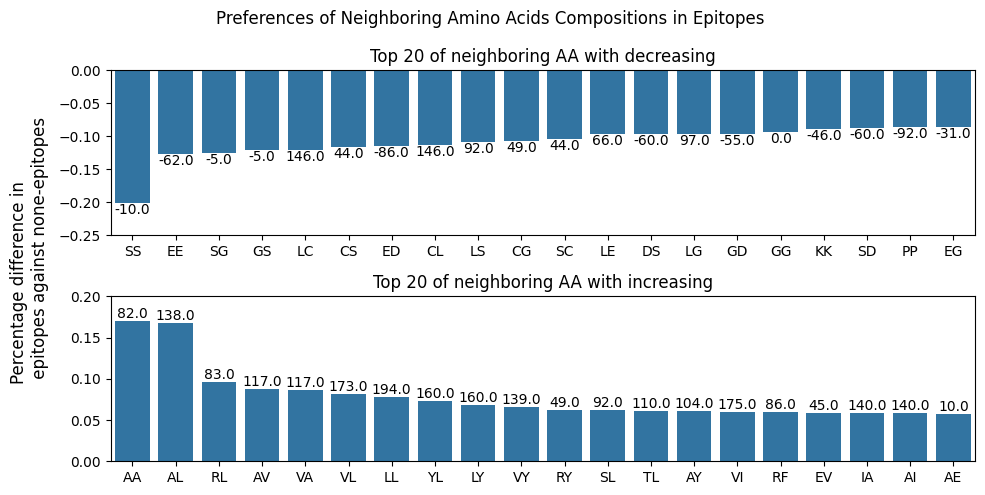

In [169]:
import seaborn as sns

fig, ax = plt.subplots(2,1, figsize=(10, 5), layout='tight')
fig.suptitle('Preferences of Neighboring Amino Acids Compositions in Epitopes')
fig.supylabel('Percentage difference in \n epitopes against none-epitopes')

i=0
ax1 = sns.barplot(decreased_df, x='aa', y='diff', ax=ax[i])
ax[i].set_title(f'Top {n} of neighboring AA with decreasing')
ax[i].set(xlabel=None, ylabel=None)
ax[i].set_ylim(-0.25, 0)
ax[i].bar_label(ax1.containers[0], labels=decreased_df['hydrophobicity'])

i=1
ax2 = sns.barplot(increased_df, x='aa', y='diff', ax=ax[i])
ax[i].set_title(f'Top {n} of neighboring AA with increasing')
ax[i].set_ylim(0, .2)
ax[i].set(xlabel=None, ylabel=None)
ax[i].bar_label(ax2.containers[0], labels=increased_df['hydrophobicity'])

## frequency of AA

In [255]:
from utils import Utils
from aa_comp import AAComp

# iterate data
json_dir = '/home/yuan/data/omics_data/epitope/mysql'
data_iter = Utils.scan_json(json_dir)
k=1
freq_1aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_1aa

,aa,counts,freq,hydrophobicity
3,L,2489378,70.073897,97.0
1,V,2064815,58.122806,76.0
7,A,1997981,56.241485,41.0
6,S,1956778,55.081655,-5.0
5,E,1860929,52.383586,-31.0
0,K,1759722,49.534694,-23.0
4,T,1722072,48.474879,13.0
17,I,1666919,46.922368,99.0
15,G,1663559,46.827787,0.0
2,R,1649655,46.436401,-14.0


/tmp/ipykernel_199407/3211245120.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(freq, x='aa', y='freq', palette=palette)


[Text(0.5, 0, ''), Text(0, 0.5, '')]

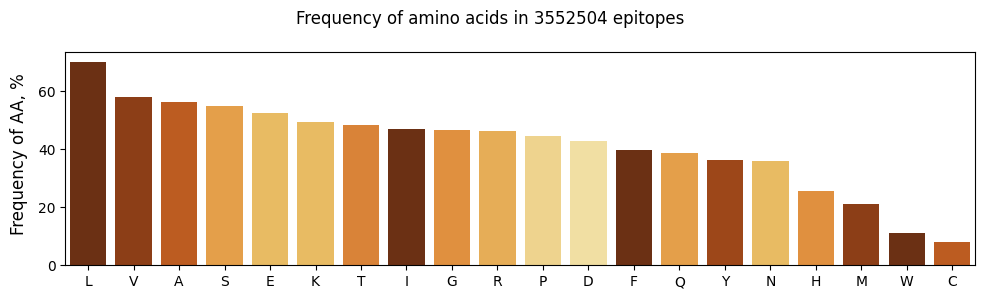

In [266]:
fig, ax = plt.subplots(1, figsize=(10,3), layout='tight')
fig.suptitle(f'Frequency of amino acids in {num_epi} epitopes')
fig.supylabel('Frequency of AA, %')

freq = freq_1aa
num_aa = len(freq)
pal = sns.color_palette("YlOrBr", num_aa)
array = freq['hydrophobicity']
max_val = max(array)
rank = [int((max_val-elem)*num_aa*0.5/(max_val + 1)) for elem in array]
palette = list(np.array(pal[::-1])[rank])
sns.barplot(freq, x='aa', y='freq', palette=palette)
ax.set(xlabel=None, ylabel=None)

In [268]:
data_iter = Utils.scan_json(json_dir)
k=2
freq_2aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_2aa

,aa,counts,freq,hydrophobicity
98,LL,344726,9.703747,194.0
2,AL,325056,9.150053,138.0
99,SL,302502,8.515177,92.0
36,AA,274612,7.730097,82.0
10,VL,270603,7.617247,173.0
...,...,...,...,...
395,MC,6942,0.195411,123.0
397,CM,5897,0.165996,123.0
242,WC,5754,0.161970,146.0
374,CW,4731,0.133174,146.0


/tmp/ipykernel_199407/1217117650.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(freq, x='aa', y='freq', palette=palette)


[Text(0.5, 0, ''), Text(0, 0.5, '')]

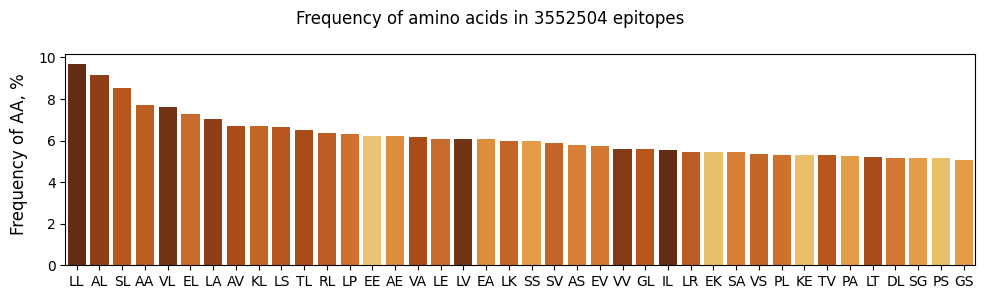

In [271]:
fig, ax = plt.subplots(1, figsize=(10,3), layout='tight')
fig.suptitle(f'Frequency of amino acids in {num_epi} epitopes')
fig.supylabel('Frequency of AA, %')

freq = freq_2aa.iloc[:40,:]
num_aa = len(freq)
pal = sns.color_palette("YlOrBr", num_aa)
array = freq['hydrophobicity']
max_val = max(array)
rank = [int((max_val-elem)*num_aa*0.5/(max_val + 1)) for elem in array]
palette = list(np.array(pal[::-1])[rank])
sns.barplot(freq, x='aa', y='freq', palette=palette)
ax.set(xlabel=None, ylabel=None)

In [272]:
data_iter = Utils.scan_json(json_dir)
k=3
freq_3aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_3aa

,aa,counts,freq,hydrophobicity
587,AAA,39897,1.123067,123.0
409,LLL,32653,0.919154,291.0
319,ALL,30246,0.851399,235.0
289,AAL,28989,0.816016,179.0
54,EEL,27566,0.775960,35.0
...,...,...,...,...
8005,WWM,28,0.000788,268.0
8004,WWC,27,0.000760,243.0
7953,CWW,19,0.000535,243.0
7888,WCM,19,0.000535,220.0


/tmp/ipykernel_199407/3155975412.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(freq, x='aa', y='freq', palette=palette)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'AAA'),
  Text(1, 0, 'LLL'),
  Text(2, 0, 'ALL'),
  Text(3, 0, 'AAL'),
  Text(4, 0, 'EEL'),
  Text(5, 0, 'ALA'),
  Text(6, 0, 'SLL'),
  Text(7, 0, 'SSL'),
  Text(8, 0, 'EAL'),
  Text(9, 0, 'LAA'),
  Text(10, 0, 'RLL'),
  Text(11, 0, 'AAV'),
  Text(12, 0, 'VLL'),
  Text(13, 0, 'PLL'),
  Text(14, 0, 'EAA'),
  Text(15, 0, 'SSS'),
  Text(16, 0, 'LLE'),
  Text(17, 0, 'EKL'),
  Text(18, 0, 'AAS'),
  Text(19, 0, 'LLA'),
  Text(20, 0, 'LLS'),
  Text(21, 0, 'ELL'),
  Text(22, 0, 'TAA'),
  Text(23, 0, 'LLD'),
  Text(24, 0, 'APA'),
  Text(25, 0, 'AVA'),
  Text(26, 0, 'LSL'),
  Text(27, 0, 'KLL'),
  Text(28, 0, 'AEL'),
  Text(29, 0, 'LAL'),
  Text(30, 0, 'AVL'),
  Text(31, 0, 'EEE'),
  Text(32, 0, 'AEA'),
  Text(33, 0, 'KEL'),
  Text(34, 0, 'VAA'),
  Text(35

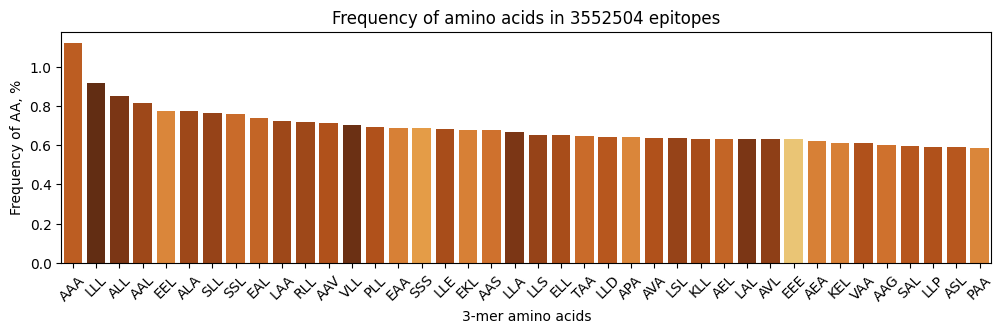

In [281]:
plt.figure(figsize=(12,3))
plt.title(f'Frequency of amino acids in {num_epi} epitopes')
plt.ylabel('Frequency of AA, %')
plt.xlabel('3-mer amino acids')

freq = freq_3aa.iloc[:40,:]
num_aa = len(freq)
pal = sns.color_palette("YlOrBr", num_aa)
array = freq['hydrophobicity']
max_val = max(array)
rank = [int((max_val-elem)*num_aa*0.5/(max_val + 1)) for elem in array]
palette = list(np.array(pal[::-1])[rank])
sns.barplot(freq, x='aa', y='freq', palette=palette)
plt.xticks(rotation=45)